In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values, get_time_domain_features
from hrvanalysis import get_frequency_domain_features, get_time_domain_features, get_geometrical_features, get_csi_cvi_features, get_poincare_plot_features
from hrvanalysis.plot import VlfBand, LfBand, HfBand
from scipy.signal import savgol_filter
import datetime
import os


In [113]:
#CHESS HRV ANALYSIS

# Read the CSV file into a DataFrame
df = pd.read_csv('Data/RR_2024_09_20_14_54.csv')
start_time = datetime.datetime(2024, 9, 10, 14, 54)  # Example starting time
# Store each column as a list
timestamp = df['timestamp'].tolist()
rr = df['sample'].tolist()
print("first", rr[:5])
rr = [float(i) for i in rr]
print("first", rr[:5])
rr_data_chess = np.array(rr)

# This remove outliers from signal
rr_intervals_without_outliers = remove_outliers(rr_intervals=rr_data_chess,low_rri=500, high_rri=1200)
# This replaces outliers nan values with linear interpolation
interpolated_rr_intervals = interpolate_nan_values(rr_intervals=rr_intervals_without_outliers,interpolation_method="linear")
# This remove ectopic beats from signal
nn_intervals_list = remove_ectopic_beats(rr_intervals=interpolated_rr_intervals, method="malik")
# This replaces ectopic beats nan values with linear interpolation
interpolated_nn_intervals_ = interpolate_nan_values(rr_intervals=nn_intervals_list)
full_signal_cleaned = interpolated_nn_intervals_

# Define the indices of the unwanted values (replace these with your actual indices)
indices_to_remove = [0, 1]  # Example: removing values at index 1 and 3
full_signal_cleaned = np.nan_to_num(full_signal_cleaned, nan=0.0)  # You can also use mean or median

# Create an array of indices to keep
indices_to_keep = np.array([i for i in range(len(full_signal_cleaned)) if i not in indices_to_remove])

# Use the indices to create a new cleaned array
cleaned_signal = full_signal_cleaned[indices_to_keep]

# Check the cleaned signal
print("Cleaned full_signal_cleaned:", cleaned_signal)

first [384, 904, 976, 968, 920]
first [384.0, 904.0, 976.0, 968.0, 920.0]
1 outlier(s) have been deleted.
The outlier(s) value(s) are : [384.0]
1 ectopic beat(s) have been deleted with malik rule.
Cleaned full_signal_cleaned: [ 976.  968.  920.  944.  944.  944.  928.  920.  912.  920.  912.  920.
  952.  992. 1016. 1016.  992.  968.  880.  864.  872.  904.  864.  896.
  936.  960.  968.  952.  960.  960.  936.  912.  888.  848.  840.  832.
  816.  816.  824.  856.  864.  856.  848.  824.  808.  808.  792.  776.
  776.  776.  720.  728.  712.  720.  712.  728.  728.  728.  712.  720.
  672.  680.  680.  672.  680.  688.  712.  744.  792.  848.  872.  864.
  840.  816.  832.  816.  816.  808.  792.  776.  792.  792.  784.  808.
  816.  816.  824.  840.  856.  856.  864.  848.  848.  840.  848.  848.
  856.  880.  872.  880.  888.  888.  888.  896.  880.  864.  864.  864.
  840.  824.  832.  808.  800.  816.  816.  840.  856.  888.  872.  856.
  848.  832.  832.  848.  848.  864.  880.  

In [114]:
# Check for NaN values in the cleaned signal
nan_check = np.isnan(full_signal_cleaned)
print("Number of NaN values:", np.sum(nan_check))  # Count NaNs
# Replace NaN values with a specific value, like 0 or mean
full_signal_cleaned = np.nan_to_num(full_signal_cleaned, nan=0.0)  # You can also use mean or median

print("Full signal cleaned (before NaN replacement):", full_signal_cleaned)

sum_all_values = np.sum(full_signal_cleaned)
print(sum_all_values)

Number of NaN values: 0
Full signal cleaned (before NaN replacement): [   0.    0.  976.  968.  920.  944.  944.  944.  928.  920.  912.  920.
  912.  920.  952.  992. 1016. 1016.  992.  968.  880.  864.  872.  904.
  864.  896.  936.  960.  968.  952.  960.  960.  936.  912.  888.  848.
  840.  832.  816.  816.  824.  856.  864.  856.  848.  824.  808.  808.
  792.  776.  776.  776.  720.  728.  712.  720.  712.  728.  728.  728.
  712.  720.  672.  680.  680.  672.  680.  688.  712.  744.  792.  848.
  872.  864.  840.  816.  832.  816.  816.  808.  792.  776.  792.  792.
  784.  808.  816.  816.  824.  840.  856.  856.  864.  848.  848.  840.
  848.  848.  856.  880.  872.  880.  888.  888.  888.  896.  880.  864.
  864.  864.  840.  824.  832.  808.  800.  816.  816.  840.  856.  888.
  872.  856.  848.  832.  832.  848.  848.  864.  880.  896.  912.  920.
  920.  904.  896.  872.  848.  848.  872.  864.  864.  888.  888.  872.
  864.  856.  840.  832.  824.  816.  816.  824.  800.

In [115]:
# Define timestamps

# Assume a starting time, defined at the first cell
#start_time = datetime.datetime(2024, 9, 10, 14, 54)  # Example starting time

# Calculate cumulative sum of RR-intervals
cumulative_sum = np.cumsum(cleaned_signal)

# Create timestamps
timestamps = [start_time + datetime.timedelta(milliseconds=ms) for ms in cumulative_sum]

# Print timestamps
#for i, timestamp in enumerate(timestamps):
    #print(f"Timestamp {i + 1}: {timestamp}")


# Assuming 'timestamps' is the list of timestamps
timestamps_data = [{"Timestamp": i + 1, "Value": timestamp} for i, timestamp in enumerate(timestamps)]

# Create DataFrame
df_time = pd.DataFrame(timestamps_data)

# Display DataFrame
# Display DataFrame
print(df_time.head())
print(df_time.tail())


# Write timestamps to a file
#with open('timestamps.txt', 'w') as f:
 #   for i, timestamp in enumerate(timestamps):
  #      f.write(f"Timestamp {i + 1}: {timestamp}\n")

   Timestamp                   Value
0          1 2024-09-10 14:54:00.976
1          2 2024-09-10 14:54:01.944
2          3 2024-09-10 14:54:02.864
3          4 2024-09-10 14:54:03.808
4          5 2024-09-10 14:54:04.752
     Timestamp                   Value
211        212 2024-09-10 14:56:54.184
212        213 2024-09-10 14:56:54.912
213        214 2024-09-10 14:56:55.632
214        215 2024-09-10 14:56:56.360
215        216 2024-09-10 14:56:57.096


In [116]:
start_time = datetime.datetime.fromtimestamp(df['timestamp'].iloc[0] / 1000)
end_time = datetime.datetime.fromtimestamp(df['timestamp'].iloc[-1] / 1000)
print("Start time:", start_time)
print("End time:", end_time)

# Convert Unix timestamp (milliseconds) to datetime objects
timestamps_datetime = [datetime.datetime.fromtimestamp(ts / 1000) for ts in df['timestamp']]
timestamps_datetime

Start time: 2024-09-20 14:54:07.323000
End time: 2024-09-20 14:57:05.371000


[datetime.datetime(2024, 9, 20, 14, 54, 7, 323000),
 datetime.datetime(2024, 9, 20, 14, 54, 8, 283000),
 datetime.datetime(2024, 9, 20, 14, 54, 9, 251000),
 datetime.datetime(2024, 9, 20, 14, 54, 10, 212000),
 datetime.datetime(2024, 9, 20, 14, 54, 11, 148000),
 datetime.datetime(2024, 9, 20, 14, 54, 12, 93000),
 datetime.datetime(2024, 9, 20, 14, 54, 13, 28000),
 datetime.datetime(2024, 9, 20, 14, 54, 13, 980000),
 datetime.datetime(2024, 9, 20, 14, 54, 14, 907000),
 datetime.datetime(2024, 9, 20, 14, 54, 15, 827000),
 datetime.datetime(2024, 9, 20, 14, 54, 16, 740000),
 datetime.datetime(2024, 9, 20, 14, 54, 17, 659000),
 datetime.datetime(2024, 9, 20, 14, 54, 18, 571000),
 datetime.datetime(2024, 9, 20, 14, 54, 19, 491000),
 datetime.datetime(2024, 9, 20, 14, 54, 20, 443000),
 datetime.datetime(2024, 9, 20, 14, 54, 21, 436000),
 datetime.datetime(2024, 9, 20, 14, 54, 22, 451000),
 datetime.datetime(2024, 9, 20, 14, 54, 23, 467000),
 datetime.datetime(2024, 9, 20, 14, 54, 24, 459000)

Mean of RR intervals: 819.89 ms
Standard Deviation of RR intervals: 76.18 ms


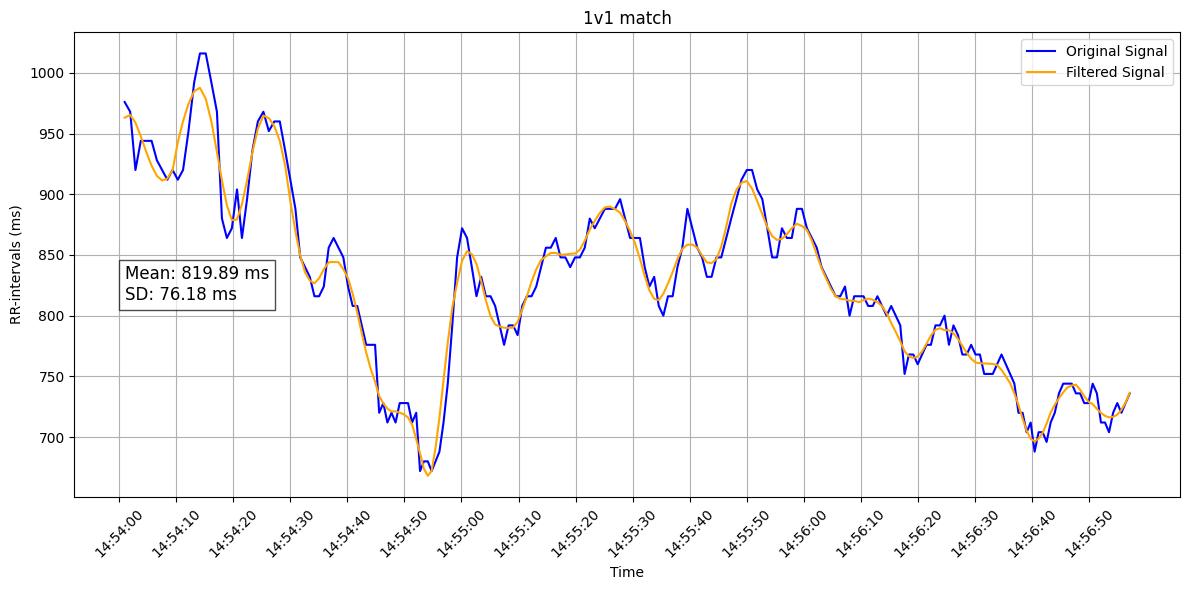

In [117]:
# Assuming cleaned_signal and timestamps are already defined
# Convert timestamps to Unix timestamps (numerical values)
timestamps_unix = [ts.timestamp() for ts in timestamps]

# Create DataFrame with timestamps and signal values
df = pd.DataFrame({'Timestamp': timestamps_unix, 'RR-intervals': cleaned_signal})

# Calculate the Savitzky-Golay filtered signal
signal_filtered = savgol_filter(cleaned_signal, window_length=20, polyorder=4)

# Add the filtered signal to the DataFrame
df['Filtered RR-intervals'] = signal_filtered

# Calculate mean and standard deviation of RR intervals
mean_rr = np.mean(cleaned_signal)
std_rr = np.std(cleaned_signal)

# Print mean and standard deviation
print(f"Mean of RR intervals: {mean_rr:.2f} ms")
print(f"Standard Deviation of RR intervals: {std_rr:.2f} ms")

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['RR-intervals'], label='Original Signal', color='blue')
plt.plot(df['Timestamp'], df['Filtered RR-intervals'], label='Filtered Signal', color='orange')

# Add mean and standard deviation as annotations
plt.text(df['Timestamp'].min(), max(cleaned_signal) * 0.8,
         f"Mean: {mean_rr:.2f} ms\nSD: {std_rr:.2f} ms",
         fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7))

# Plot configurations
plt.title('1v1 match')
plt.xlabel('Time')
plt.ylabel('RR-intervals (ms)')
plt.legend()
plt.grid(True)

# Set x-ticks and format them as HH:MM:SS
plt.xticks(ticks=range(int(min(timestamps_unix)), int(max(timestamps_unix)), 10), rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.fromtimestamp(x).strftime('%H:%M:%S')))

plt.tight_layout()  # Adjust layout
plt.show()

In [118]:
# Automated preprocessing and saving

# Define input and output directories
input_dir = 'Data'
output_dir = 'Data/Cleaned_data'
os.makedirs(output_dir, exist_ok=True)  # Ensure the output directory exists

# List of RR files to process
rr_files = [
    'RR_2024_09_20_14_35.csv',
    'RR_2024_09_20_14_40.csv',
    'RR_2024_09_20_14_45.csv',
    'RR_2024_09_20_14_49.csv',
    'RR_2024_09_20_14_54.csv'
]

def process_rr_file(filename):
    # Load the file
    file_path = os.path.join(input_dir, filename)
    df = pd.read_csv(file_path)

    # Extract RR intervals and timestamps
    rr = df['sample'].astype(float).tolist()
    rr_data_chess = np.array(rr)

    # Preprocess: Remove outliers, interpolate NaNs, remove ectopic beats
    rr_intervals_without_outliers = remove_outliers(rr_intervals=rr_data_chess, low_rri=500, high_rri=1200)
    interpolated_rr_intervals = interpolate_nan_values(rr_intervals=rr_intervals_without_outliers, interpolation_method="linear")
    nn_intervals_list = remove_ectopic_beats(rr_intervals=interpolated_rr_intervals, method="malik")
    cleaned_signal = interpolate_nan_values(rr_intervals=nn_intervals_list)

    # Replace any remaining NaNs with zero (or mean/median as needed)
    #cleaned_signal = np.nan_to_num(cleaned_signal, nan=0.0)

    # Define the indices of the unwanted values
    indices_to_replace = [0, 1]  # Indices to replace

    # Ensure no NaN values in the signal
    cleaned_signal = np.nan_to_num(cleaned_signal, nan=0.0)

    # Calculate the sum of the RRi values
    rri_mean = np.mean(cleaned_signal)
    print(rri_mean)
    # Replace the specified indices with the sum of the RRi values
    for idx in indices_to_replace:
        if idx < len(cleaned_signal):  # Ensure the index is within bounds
            cleaned_signal[idx] = rri_mean


    # Define starting time from the first timestamp in the file
    start_time = datetime.datetime.fromtimestamp(df['timestamp'].iloc[0] / 1000)

    # Create adjusted timestamps
    cumulative_sum = np.cumsum(cleaned_signal)
    adjusted_time = [start_time + datetime.timedelta(milliseconds=ms) for ms in cumulative_sum]

    # Apply Savitzky-Golay filtering for smoothing
    smoothed_signal = savgol_filter(cleaned_signal, window_length=20, polyorder=4)

    # Create cleaned DataFrame
    cleaned_df = pd.DataFrame({
        'adjusted_time': adjusted_time,
        'Raw RRi': cleaned_signal,
        'Smoothed RRi' : smoothed_signal
    })

    # Save the cleaned data
    output_file = os.path.join(output_dir, filename.replace('.csv', '_cleaned.csv'))
    cleaned_df.to_csv(output_file, index=False)
    print(f"Saved cleaned RR data to: {output_file}")

# Process all files
for rr_file in rr_files:
    process_rr_file(rr_file)


1 outlier(s) have been deleted.
The outlier(s) value(s) are : [376.0]
1 ectopic beat(s) have been deleted with malik rule.
927.953488372093
Saved cleaned RR data to: Data/Cleaned_data\RR_2024_09_20_14_35_cleaned.csv
2 outlier(s) have been deleted.
The outlier(s) value(s) are : [376.0, 400.0]
1 ectopic beat(s) have been deleted with malik rule.
925.4117647058823
Saved cleaned RR data to: Data/Cleaned_data\RR_2024_09_20_14_40_cleaned.csv
1 outlier(s) have been deleted.
The outlier(s) value(s) are : [376.0]
1 ectopic beat(s) have been deleted with malik rule.
907.9024390243902
Saved cleaned RR data to: Data/Cleaned_data\RR_2024_09_20_14_45_cleaned.csv
2 outlier(s) have been deleted.
The outlier(s) value(s) are : [488.0, 1432.0]
1 ectopic beat(s) have been deleted with malik rule.
938.5964912280701
Saved cleaned RR data to: Data/Cleaned_data\RR_2024_09_20_14_49_cleaned.csv
1 outlier(s) have been deleted.
The outlier(s) value(s) are : [384.0]
1 ectopic beat(s) have been deleted with malik r

Mean of RR intervals: 938.74 ms
Standard Deviation of RR intervals: 29.89 ms


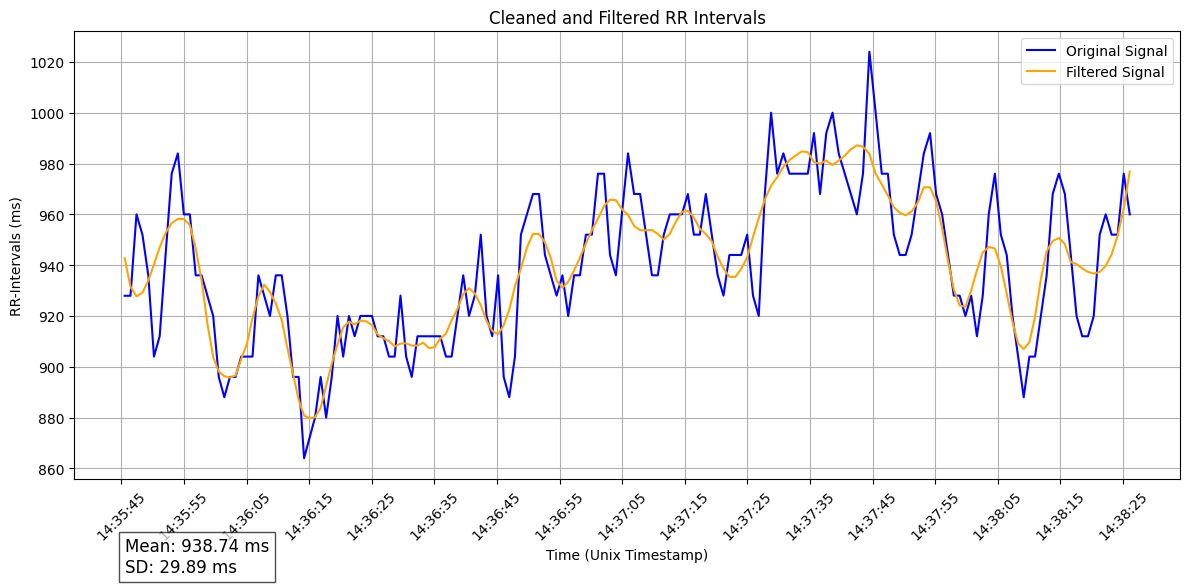

In [119]:
from datetime import timedelta
# Load the cleaned RR file (replace with an actual cleaned RR file path)
cleaned_rr_file = 'Data/Cleaned_data/RR_2024_09_20_14_35_cleaned.csv'
df_cleaned_rr = pd.read_csv(cleaned_rr_file)

# Convert adjusted_time to datetime objects
# Convert adjusted_time to datetime objects
timestamps = pd.to_datetime(df_cleaned_rr['adjusted_time'])
timestamps = timestamps - pd.DateOffset(hours=2)
# Convert datetime to Unix timestamps for plotting
timestamps_unix = timestamps.apply(lambda x: x.timestamp()).to_numpy()

# Extract RR intervals
cleaned_signal = df_cleaned_rr['Raw RRi'].to_numpy()


# Calculate mean and standard deviation of the RR intervals
mean_rr = np.mean(cleaned_signal)
std_rr = np.std(cleaned_signal)

# Print mean and standard deviation
print(f"Mean of RR intervals: {mean_rr:.2f} ms")
print(f"Standard Deviation of RR intervals: {std_rr:.2f} ms")

# Plot the original and filtered RR signals
plt.figure(figsize=(12, 6))
plt.plot(timestamps_unix, cleaned_signal, label='Original Signal', color='blue')
plt.plot(timestamps_unix, df_cleaned_rr['Smoothed RRi'], label='Filtered Signal', color='orange')

# Add mean and standard deviation as annotations
plt.text(
    min(timestamps_unix), max(cleaned_signal) * 0.8,
    f"Mean: {mean_rr:.2f} ms\nSD: {std_rr:.2f} ms",
    fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7)
)

# Plot configurations
plt.title('Cleaned and Filtered RR Intervals')
plt.xlabel('Time (Unix Timestamp)')
plt.ylabel('RR-Intervals (ms)')
plt.legend()
plt.grid(True)

# Set x-ticks and format them as HH:MM:SS
plt.xticks(ticks=range(int(min(timestamps_unix)), int(max(timestamps_unix)), 10), rotation=45)
# Format x-ticks to display as HH:MM:SS
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.fromtimestamp(x).strftime('%H:%M:%S')))
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout
plt.show()


In [120]:
# Sliding window analysis + extracting HRV features

# Sliding window analysis function
def sliding_window_analysis(signal, timestamps, window_length, overlap_percentage):
    results = []
    overlap = int(window_length * (overlap_percentage / 100))

    # Frequency bands
    vlf_band = VlfBand(low=0.003, high=0.04)
    lf_band = LfBand(low=0.04, high=0.15)
    hf_band = HfBand(low=0.15, high=0.4)

    for i in range(0, len(signal) - window_length + 1, overlap):
        window = signal[i:i + window_length]
        window_timestamps_ = timestamps[i:i + window_length]
        window_mean = np.mean(window)
        window_center_time = np.mean(window_timestamps_)

        # Extract features
        window_features_freq = get_frequency_domain_features(window, vlf_band=vlf_band, lf_band=lf_band, hf_band=hf_band)
        window_features_time = get_time_domain_features(window)
        window_features_nonlin = get_csi_cvi_features(window)
        window_features_poincare = get_poincare_plot_features(window)

        # Collect all results
        results.append({
            'Timestamps': window_center_time,
            'mean_rr': window_mean,
            #'timestamps': window_timestamps_,
            'window_timestamps': list(window_timestamps_),  # Save all timestamps in the window
            **window_features_freq,
            **window_features_time,
            **window_features_nonlin,
            **window_features_poincare
        })
    return results

# Example: Process cleaned RR data
cleaned_rr_file = 'Data/Cleaned_data/RR_2024_09_20_14_54_cleaned.csv'
df_cleaned_rr = pd.read_csv(cleaned_rr_file)

# Convert adjusted_time to Unix timestamps
timestamps = pd.to_datetime(df_cleaned_rr['adjusted_time']).apply(lambda x: x.timestamp()).to_numpy()
rr_data_cleaned = df_cleaned_rr['Raw RRi'].to_numpy()

# Set window length and overlap percentage
window_length = 6  # Adjust as needed
overlap_percentage = 90  # Adjust as needed

# Perform sliding window analysis
window_results = sliding_window_analysis(rr_data_cleaned, timestamps, window_length, overlap_percentage)

# Convert results into a DataFrame
hrv_features_df = pd.DataFrame(window_results)




C:\Users\Dominik\PycharmProjects\Thesis_1_pycharm\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 19, using nperseg = 19
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Thesis_1_pycharm\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 20, using nperseg = 20
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Thesis_1_pycharm\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 18, using nperseg = 18
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Thesis_1_pycharm\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 17, using nperseg = 17
  warnings.warn('nperseg = {0:d}

In [121]:
hrv_features_df

,Timestamps,mean_rr,window_timestamps,lf,hf,lf_hf_ratio,lfnu,hfnu,total_power,vlf,...,mean_hr,max_hr,min_hr,std_hr,csi,cvi,Modified_csi,sd1,sd2,ratio_sd2_sd1
0,1.726844e+09,905.455657,"[1726844048.135367, 1726844048.947734, 1726844...",752.589784,1438.190983,0.523289,34.352583,65.647417,2410.295776,219.515010,...,66.658681,73.858246,61.475410,5.229320,1.550031,4.910571,550.549147,57.286906,88.796477,1.550031
1,1.726844e+09,932.000000,"[1726844052.755734, 1726844053.699734, 1726844...",11.919823,46.056005,0.258811,20.559988,79.440012,58.458255,0.482427,...,64.390001,65.789474,63.559322,0.892888,4.088311,3.165912,316.425753,4.732864,19.349419,4.088311
2,1.726844e+09,934.666667,"[1726844057.403734, 1726844058.323734, 1726844...",50.709113,121.815108,0.416279,29.392460,70.607540,182.412835,9.888614,...,64.253802,65.789474,60.483871,1.927667,3.084009,3.976537,527.159286,13.856406,42.733281,3.084009
3,1.726844e+09,977.333333,"[1726844062.099734, 1726844063.115734, 1726844...",139.809257,224.033294,0.624056,38.425758,61.574242,396.175386,32.332835,...,61.540545,68.181818,59.055118,3.132904,2.228382,4.491829,586.001477,29.502542,65.742934,2.228382
4,1.726844e+09,880.000000,"[1726844066.971734, 1726844067.835734, 1726844...",11.124653,79.467481,0.139990,12.279933,87.720067,92.322285,1.730150,...,68.202336,69.444444,66.371681,1.178713,0.387720,3.482480,13.305068,22.126907,8.579044,0.387720
5,1.726844e+09,945.333333,"[1726844071.371734, 1726844072.307734, 1726844...",71.848108,98.365309,0.730421,42.210602,57.789398,192.845573,22.632156,...,63.512588,66.964286,61.983471,1.677731,2.334733,3.910016,321.635559,14.751271,34.440286,2.334733
6,1.726844e+09,917.333333,"[1726844076.147734, 1726844077.107734, 1726844...",77.039066,234.311879,0.328789,24.743482,75.256518,313.588301,2.237356,...,65.535720,70.754717,62.500000,2.941537,6.069047,3.997540,1490.908508,10.119289,61.414439,6.069047
7,1.726844e+09,829.333333,"[1726844080.691734, 1726844081.531734, 1726844...",14.948607,50.605322,0.295396,22.803526,77.196474,68.261589,2.707660,...,72.362172,73.529412,70.754717,1.036570,2.684237,3.252034,185.886722,6.449806,17.312808,2.684237
8,1.726844e+09,845.333333,"[1726844084.819734, 1726844085.675734, 1726844...",31.990736,46.184494,0.692673,40.921831,59.078169,88.719204,10.543974,...,71.002858,72.815534,69.444444,1.336403,1.290994,3.665292,99.777530,14.966630,19.321836,1.290994
9,1.726844e+09,797.333333,"[1726844089.067734, 1726844089.875734, 1726844...",10.618872,58.482922,0.181572,15.366999,84.633001,69.405080,0.303287,...,75.287856,77.319588,72.815534,1.668954,4.307616,3.422688,459.938289,6.196773,26.693320,4.307616


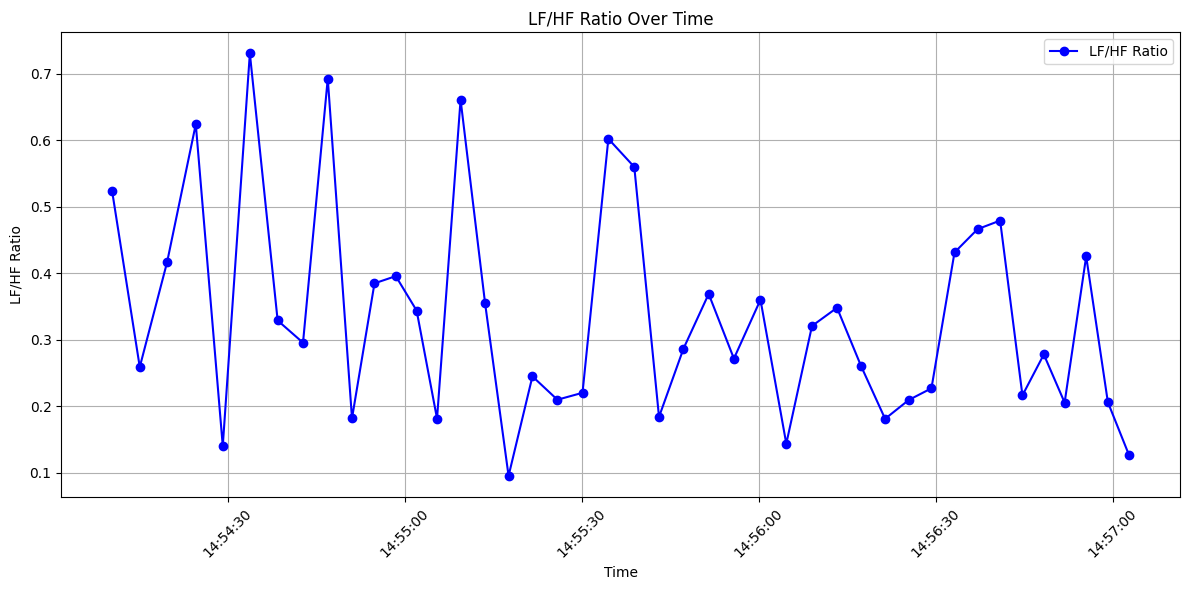

In [122]:
# Convert 'window_start' from Unix timestamp to datetime for plotting
hrv_features_df['Timestamps'] = pd.to_datetime(hrv_features_df['Timestamps'], unit='s')

# Plot LF/HF ratio over time
plt.figure(figsize=(12, 6))
plt.plot(hrv_features_df['Timestamps'], hrv_features_df['lf_hf_ratio'], label='LF/HF Ratio', color='blue', marker='o')
plt.title('LF/HF Ratio Over Time')
plt.xlabel('Time')
plt.ylabel('LF/HF Ratio')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [123]:
# # Save the DataFrame to a CSV file
# output_file = 'Data/Cleaned_data/HRV_2024_09_20_14_35.csv'
# hrv_features_df.to_csv(output_file, index=False)
# print(f"HRV features saved to: {output_file}")

HRV features saved to: Data/Cleaned_data/HRV_2024_09_20_14_35.csv


In [126]:
# Extract all features from all 5 RR data, one by one, save them into dataframes

# Define the directory paths
cleaned_rr_dir = 'Data/Cleaned_data'
hrv_output_dir = 'Data/HRV_data'
os.makedirs(hrv_output_dir, exist_ok=True)  # Create the HRV output directory if it doesn't exist

# List of cleaned RR files to process
cleaned_rr_files = [
    'RR_2024_09_20_14_35_cleaned.csv',
    'RR_2024_09_20_14_40_cleaned.csv',
    'RR_2024_09_20_14_45_cleaned.csv',
    'RR_2024_09_20_14_49_cleaned.csv',
    'RR_2024_09_20_14_54_cleaned.csv'
]

# Sliding window analysis function
def sliding_window_analysis(signal, timestamps, window_length, overlap_percentage):
    results = []
    overlap = int(window_length * (overlap_percentage / 100))

    # Frequency bands
    vlf_band = VlfBand(low=0.003, high=0.04)
    lf_band = LfBand(low=0.04, high=0.15)
    hf_band = HfBand(low=0.15, high=0.4)

    for i in range(0, len(signal) - window_length + 1, overlap):
        window = signal[i:i + window_length]
        window_timestamps_ = timestamps[i:i + window_length]
        window_mean = np.mean(window)
        window_center_time = np.mean(window_timestamps_)

        # Extract features
        window_features_freq = get_frequency_domain_features(window, vlf_band=vlf_band, lf_band=lf_band, hf_band=hf_band)
        window_features_time = get_time_domain_features(window)
        window_features_nonlin = get_csi_cvi_features(window)
        window_features_poincare = get_poincare_plot_features(window)

        # Collect all results
        results.append({
            'Timestamps': window_center_time,
            'mean_rr': window_mean,
            'window_timestamps': list(window_timestamps_),
            **window_features_freq,
            **window_features_time,
            **window_features_nonlin,
            **window_features_poincare
        })
    return results

# Automate feature extraction for all cleaned RR files
window_length = 6  # Adjust as needed
overlap_percentage = 90  # Adjust as needed

for rr_file in cleaned_rr_files:
    # Load cleaned RR file
    cleaned_rr_path = os.path.join(cleaned_rr_dir, rr_file)
    df_cleaned_rr = pd.read_csv(cleaned_rr_path)

    # Convert adjusted_time to Unix timestamps
    timestamps = pd.to_datetime(df_cleaned_rr['adjusted_time']).apply(lambda x: x.timestamp()).to_numpy()
    rr_data_cleaned = df_cleaned_rr['Raw RRi'].to_numpy()

    # Perform sliding window analysis
    window_results = sliding_window_analysis(rr_data_cleaned, timestamps, window_length, overlap_percentage)

    # Convert results into a DataFrame
    hrv_features_df = pd.DataFrame(window_results)

    # Save the HRV features to a CSV file
    #hrv_output_file = os.path.join(hrv_output_dir, rr_file.replace('RR', 'HRV'))
   # output_filename = rr_file.replace("_cleaned", "").replace("RR", "HRV")

    output_filename = rr_file.replace("_cleaned", "").replace("RR", "HRV")
    hrv_output_file = os.path.join(hrv_output_dir, output_filename)
    hrv_features_df.to_csv(hrv_output_file, index=False)
    print(f"HRV features saved to: {hrv_output_file}")

HRV features saved to: Data/HRV_data\HRV_2024_09_20_14_35.csv
HRV features saved to: Data/HRV_data\HRV_2024_09_20_14_40.csv
HRV features saved to: Data/HRV_data\HRV_2024_09_20_14_45.csv
HRV features saved to: Data/HRV_data\HRV_2024_09_20_14_49.csv
HRV features saved to: Data/HRV_data\HRV_2024_09_20_14_54.csv


C:\Users\Dominik\PycharmProjects\Thesis_1_pycharm\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 19, using nperseg = 19
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Thesis_1_pycharm\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 20, using nperseg = 20
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Thesis_1_pycharm\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 18, using nperseg = 18
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dominik\PycharmProjects\Thesis_1_pycharm\SportLab\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 20, using nperseg = 20
  warnings.warn('nperseg = {0:d}

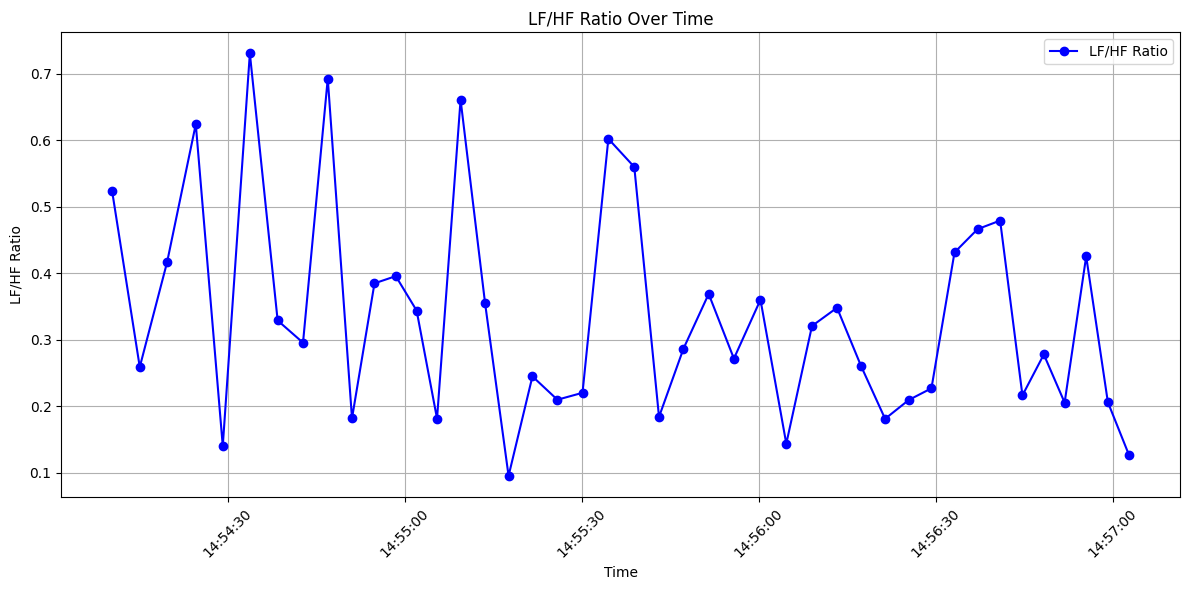

In [128]:
hrv_features_df = pd.read_csv('Data/HRV_data/HRV_2024_09_20_14_54.csv')
# Convert 'window_start' from Unix timestamp to datetime for plotting
hrv_features_df['Timestamps'] = pd.to_datetime(hrv_features_df['Timestamps'], unit='s')

# Plot LF/HF ratio over time
plt.figure(figsize=(12, 6))
plt.plot(hrv_features_df['Timestamps'], hrv_features_df['lf_hf_ratio'], label='LF/HF Ratio', color='blue', marker='o')
plt.title('LF/HF Ratio Over Time')
plt.xlabel('Time')
plt.ylabel('LF/HF Ratio')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()